<a href="https://colab.research.google.com/github/vishnuaswanth/ML_projects/blob/main/Ash_M3_MP3_NB_Detection_of_Spam_Emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Learning
## A program by IIT Madras and TalentSprint
### Mini Project 03 : Detection of Spam/ham Emails

## Learning Objectives

At the end of the mini project, you will be able to

* understand the application of machine learning in the detection of spam emails.
* use a real world dataset.
* Implement various machine learning models.
* compare between different types of classification methods and their pros and cons.

**Packages used:**  
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` and `Seaborn` for visualization
*  `sklearn` for the metrics and pre-processing



### Introduction

Machine learning is connected with the field of education related to algorithms which continuously keeps on learning from various examples and then applying them to real-world problems.  Classification is a task of Machine Learning which assigns a label value to a specific class and then can identify a particular type to be of one kind or another. The most basic example can be of the mail spam filtration system where one can classify a mail as either “spam” or “not spam”. You will encounter multiple types of classification challenges and there exist some specific approaches for the type of model that might be used for each challenge.

### Dataset Description

The collection consists of '0030228easyham.tar.bz2' and '20030228_spam.tar.bz2' taking from https://spamassassin.apache.org/old/publiccorpus/ i.e. _Apache SpamAssassin’s public datasets_. There are 2500 ham and 500 spam emails in the dataset.


In [ ]:
#@title Download dataset
!wget https://cdn.extras.talentsprint.com/ADSMI/Datasets/spam_or_not_spam.zip
!unzip "spam_or_not_spam.zip"

--2024-05-05 02:55:07--  https://cdn.extras.talentsprint.com/ADSMI/Datasets/spam_or_not_spam.zip
Resolving cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)... 172.105.52.210
Connecting to cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1177632 (1.1M) [application/zip]
Saving to: ‘spam_or_not_spam.zip’

spam_or_not_spam.zi 100%[===================>]   1.12M   835KB/s    in 1.4s    

2024-05-05 02:55:09 (835 KB/s) - ‘spam_or_not_spam.zip’ saved [1177632/1177632]

Archive:  spam_or_not_spam.zip
  inflating: spam_or_not_spam.csv    


In [ ]:
# import the libraries used for machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay
from sklearn.metrics import roc_curve

In [ ]:
# Print the top 5 data points
df = pd.read_csv('/content/spam_or_not_spam.csv')
df.head()
# YOUR CODE HERE

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


### **Exercise 1**: Perform the following

- Exploratory Data Analysis (2 points)
- Preprocessing (1 point)

In [ ]:
df= df.fillna(value={'email':""})
df[df['email']==""]

,email,label
2966,,1


In [ ]:
# Print the number of spam and not spam emails.
print(f"number of spam emails: {df[df['label'] == 0]['label'].count()}")
print(f"number of not spam emails: {df[df['label'] == 1]['label'].count()}")
# YOUR CODE HERE

number of spam emails: 2500
number of not spam emails: 500


In [ ]:
import seaborn as sns

<Axes: xlabel='email_length', ylabel='Count'>

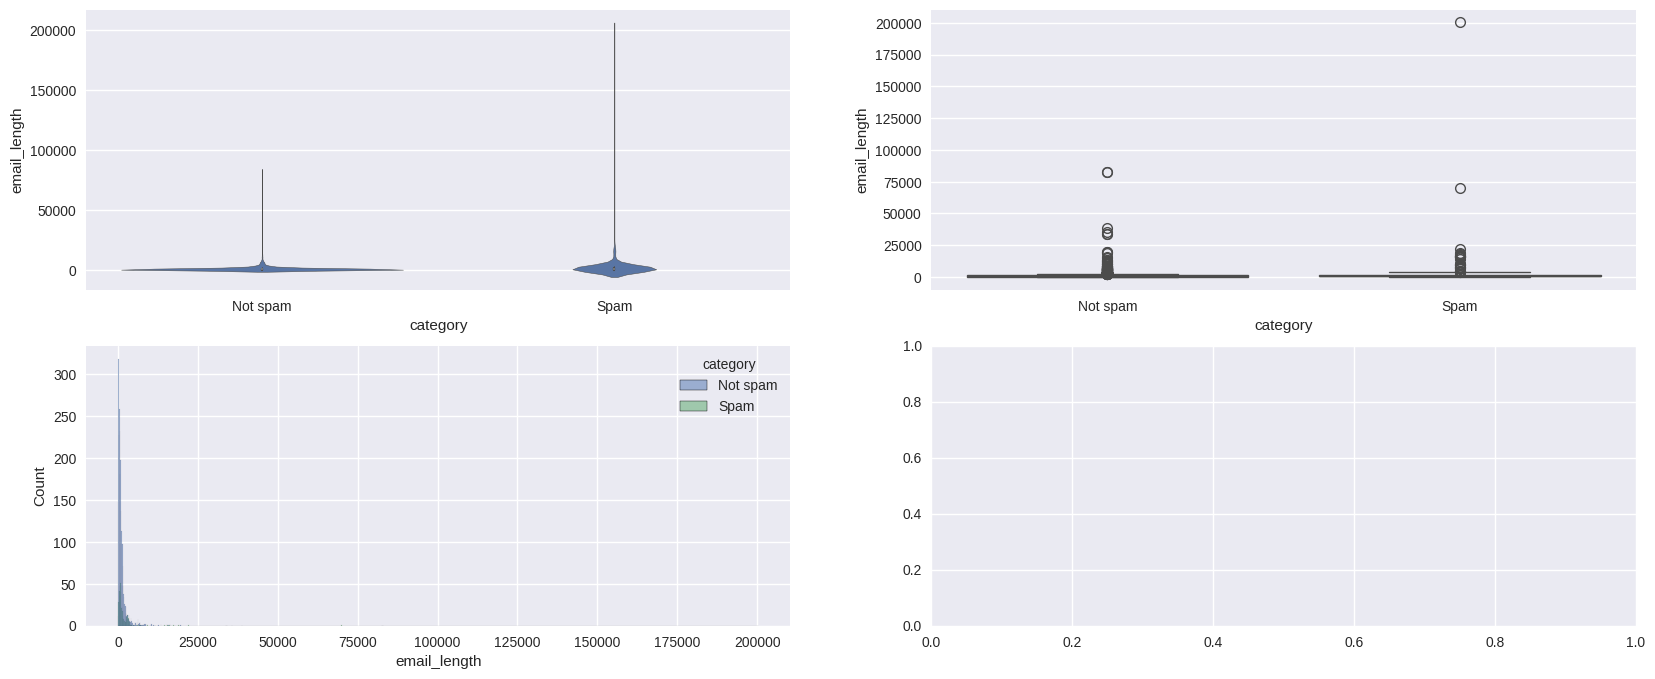

In [ ]:
#Plot distribution of emails with the email-length
df['category']=''
df.loc[df['label']==0,'category']= 'Not spam'
df.loc[df['label']==1,'category']= 'Spam'

df['email_length']=df['email'].apply(lambda x: len(x))
f,ax = plt.subplots(2,2,figsize=(20,8))
sns.violinplot(data=df, x='category', y='email_length', ax=ax[0][0])
sns.boxplot(data= df, x='category', y='email_length', ax=ax[0][1])
sns.histplot(data= df, x='email_length', hue='category', ax=ax[1][0])
# YOUR CODE HERE

<Axes: xlabel='email_length', ylabel='Count'>

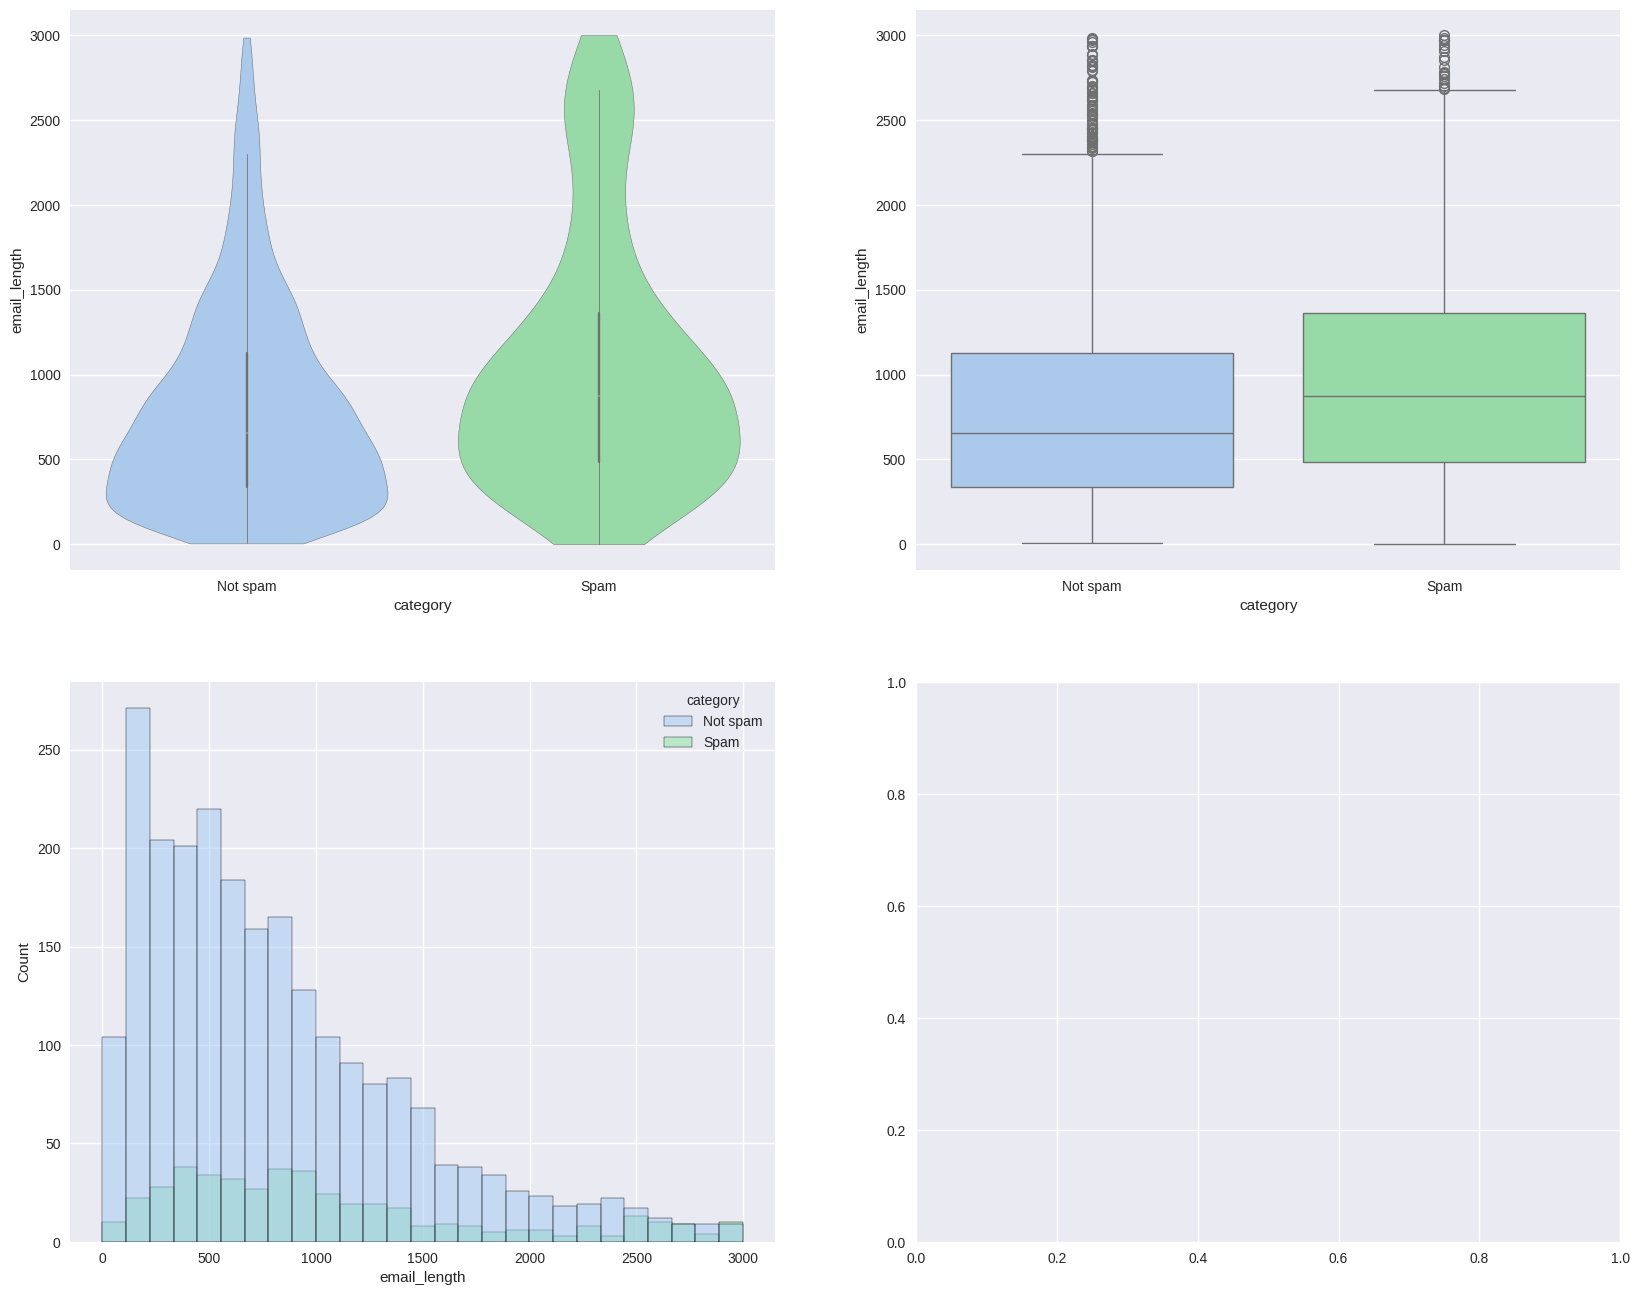

In [ ]:
new_df = df[df['email_length']<3000]
palette =sns.color_palette("pastel6")
sns.set_palette(palette)
f,ax = plt.subplots(2,2,figsize=(20,16))
sns.violinplot(data=new_df, x='category', y='email_length',  hue='category', ax=ax[0][0], cut =0)
sns.boxplot(data= new_df, x='category', y='email_length', hue='category', ax=ax[0][1])
sns.histplot(data= new_df, x='email_length', hue='category', ax=ax[1][0])

### **Exercise 2**:
* Implement Count Vectorizer on Train and Test Data (1 Point)

In [ ]:
# Perform the Train test splitting
# YOUR CODE HERE
my_X = df[df['label']==1]['email'].values
X = df['email'].values
y = df['label'].values
# my_X = my_X.flatten()
my_X[:5]

array([' save up to NUMBER on life insurance why spend more than you have to life quote savings ensuring your family s financial security is very important life quote savings makes buying life insurance simple and affordable we provide free access to the very best companies and the lowest rates life quote savings is fast easy and saves you money let us help you get started with the best values in the country on new coverage you can save hundreds or even thousands of dollars by requesting a free quote from lifequote savings our service will take you less than NUMBER minutes to complete shop and compare save up to NUMBER on all types of life insurance hyperlink click here for your free quote protecting your family is the best investment you ll ever make if you are in receipt of this email in error and or wish to be removed from our list hyperlink please click here and type remove if you reside in any state which prohibits e mail solicitations for insurance please disregard this email ',


In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110, stopwords = set(STOPWORDS))

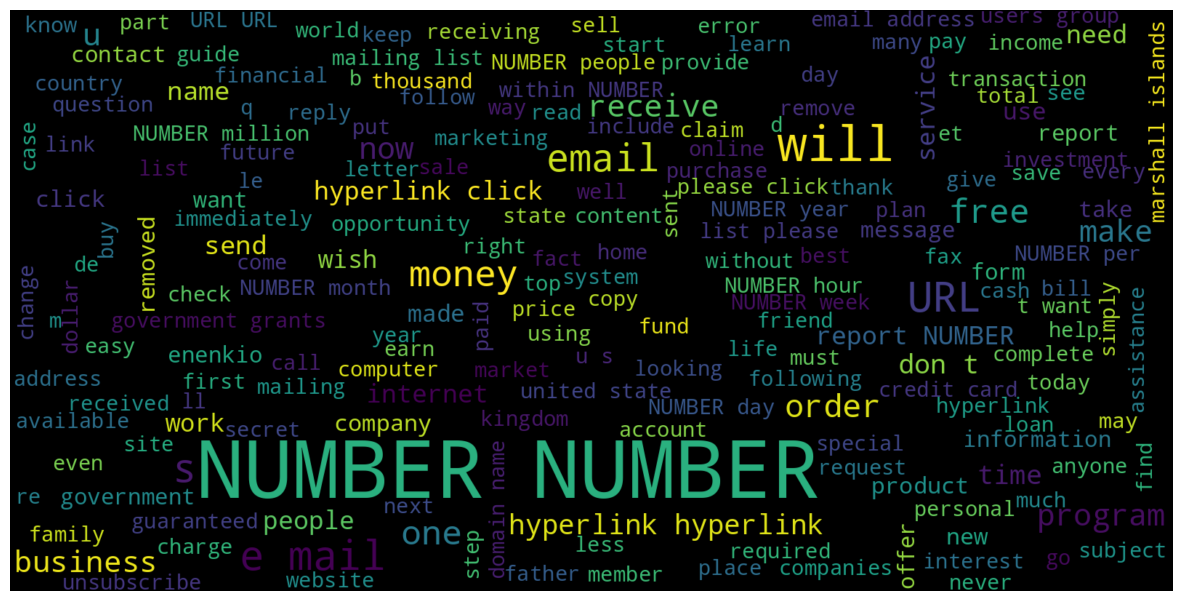

In [ ]:
words = ' '.join(my_X)

plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(words),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
tokensizer = CountVectorizer(ngram_range=(2,2), min_df=0.01, stop_words='english')
tokensizer.fit(my_X)
feature = tokensizer.transform(X)
feature = feature.toarray()
unscaled_feature_1 = feature
scaler = StandardScaler()
feature = scaler.fit_transform(feature)

feature.shape


(3000, 2361)

In [ ]:
tokensizer_2 = CountVectorizer(ngram_range=(1,2), min_df=0.01, max_features=1000, stop_words='english')
tokensizer_2.fit(my_X)
feature_2 = tokensizer_2.transform(X)
print(type(feature_2))
feature_2 = feature_2.toarray()
unscaled_feature_2 = feature_2
print(type(feature_2))
scaler_2 = StandardScaler()
feature_2 = scaler_2.fit_transform(feature_2)
feture_2 = scaler
X_train_2, X_test_2, y_train_2,y_test_2 = train_test_split(feature_2,y, train_size=0.8, random_state=42)

feature_2.shape


<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>


(3000, 1000)

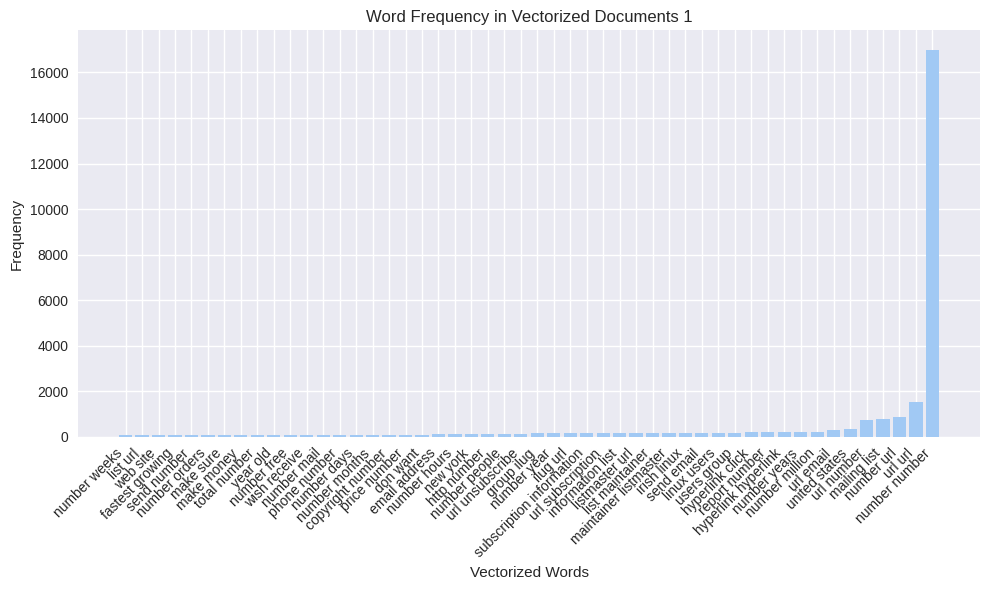

In [ ]:
vectorized_words = tokensizer.get_feature_names_out()
word_frequencies = np.sum(unscaled_feature_1, axis=0)
sortedIndex = np.argsort(word_frequencies)[-50:]
words = [vectorized_words[i] for i in sortedIndex]
plt.figure(figsize=(10, 6))
plt.bar(words, word_frequencies[sortedIndex])
plt.xlabel('Vectorized Words')
plt.ylabel('Frequency')
plt.title('Word Frequency in Vectorized Documents 1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
vectorized_words[:5]

array(['able', 'absolutely', 'absolutely free', 'abuse', 'accept'],
      dtype=object)

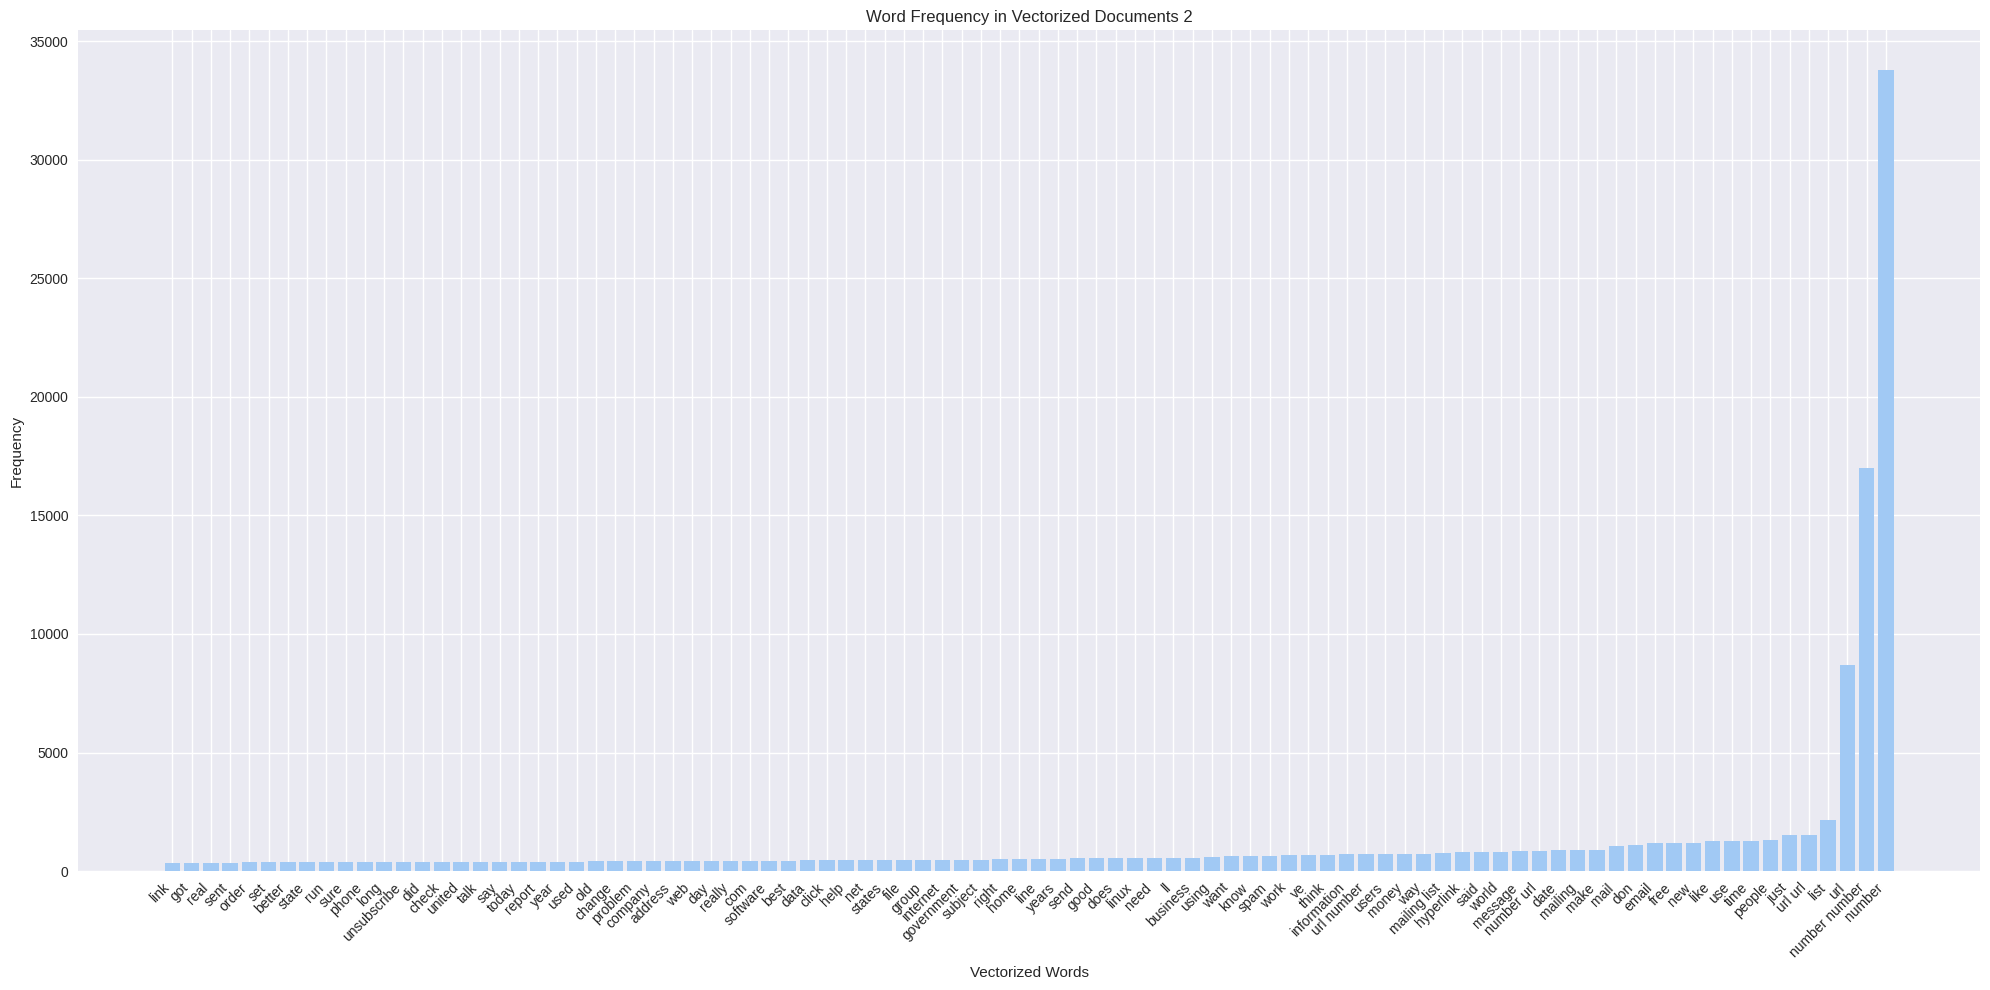

In [ ]:
vectorized_words = tokensizer_2.get_feature_names_out()
word_frequencies = np.sum(unscaled_feature_2, axis=0)
sortedIndex = np.argsort(word_frequencies)[-90:]
words = [vectorized_words[i] for i in sortedIndex]
plt.figure(figsize=(20, 10))
plt.bar(words, word_frequencies[sortedIndex])
plt.xlabel('Vectorized Words')
plt.ylabel('Frequency')
plt.title('Word Frequency in Vectorized Documents 2')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Count vectorizer for Train and Test emails
# YOUR CODE HERE
X_train, X_test, y_train,y_test = train_test_split(feature,y, train_size=0.8, random_state=42)

### **Exercise 3** (4 Points)

Train the model using the 4 ML models:

- Logistic Regression
- SVM
- Naive Bayes
-Decision Tree

**Logistic Regression**

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

For notational ease, we assume that the target takes values in the set {0,1} for data point . Once fitted, the predict_proba method of LogisticRegression predicts the probability of the positive class P(y_i=1|X_i) as 1/(1+exp(-X_i*w-b)).


**SVM**

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
SVM algorithm helps to find the best line or decision boundary; this best boundary or region is called as a hyperplane. SVM algorithm finds the closest point of the lines from both the classes. These points are called support vectors. The distance between the vectors and the hyperplane is called as margin. And the goal of SVM is to maximize this margin. The hyperplane with maximum margin is called the optimal hyperplane.
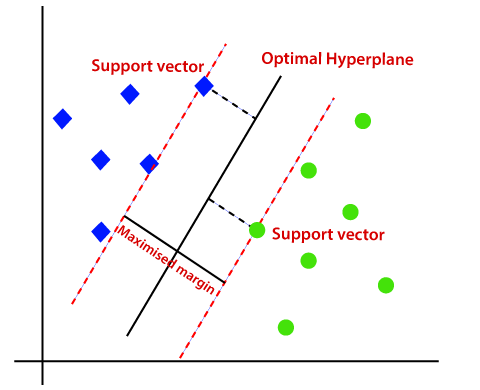


**Decision Tree**

Decision Tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

Construction of Decision Tree: A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions. The construction of a decision tree classifier does not require any domain knowledge or parameter setting, and therefore is appropriate for exploratory knowledge discovery. Decision trees can handle high-dimensional data. In general decision tree classifier has good accuracy. Decision tree induction is a typical inductive approach to learn knowledge on classification.

In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state= 42)

In [ ]:
from sklearn.metrics import roc_curve, auc
def generate_roc_curve(pred_prob, y_test, label='model'):
  # roc curve for models
  fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

  # roc curve for tpr = fpr
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

  plt.style.use('seaborn')

  # plot roc curves
  plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=label)

  plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
  area = auc(fpr1, tpr1)
  # title
  plt.title(f'ROC curve :{ area }')
  # x label
  plt.xlabel('False Positive Rate')
  # y label
  plt.ylabel('True Positive rate')

  plt.legend(loc='best')
  # plt.savefig('ROC',dpi=300)
  plt.show();

In [ ]:
# model 1: Logistic Regression
LR = LogisticRegression(class_weight='balanced', max_iter=500)
#model 2: Naive Bayes
NB = GaussianNB()
# model 3: Support Vector Classifier
MY_SVC = SVC(class_weight='balanced', probability=True, kernel='linear', C=10)
# model 4: Decision Tree Classifier
DT = DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=50)


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
accuracy = LR.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.9733333333333334


In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)
accuracy = NB.score(X_test, y_test)
print("Accuracy: ", accuracy)
# NB.get_depth()

Accuracy:  0.9533333333333334


In [ ]:
# model 3: SVM selection
parameters = {'kernel':['linear'], 'C':[1,10,50, 100]}
svc = SVC(class_weight='balanced', probability=True)
clf = GridSearchCV(svc, parameters, scoring= 'accuracy')
clf.fit(X_train, y_train)


GridSearchCV(estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [1, 10, 50, 100], 'kernel': ['linear']},
             scoring='accuracy')

In [ ]:
print("Parameters: ",clf.cv_results_['params'])
print("Mean test score: ",clf.cv_results_['mean_test_score'])
print("Standard test error: ",clf.cv_results_['std_test_score'])
print("CV Ranking",clf.cv_results_['rank_test_score'])

Parameters:  [{'C': 1, 'kernel': 'linear'}, {'C': 10, 'kernel': 'linear'}, {'C': 50, 'kernel': 'linear'}, {'C': 100, 'kernel': 'linear'}]
Mean test score:  [0.96958333 0.97041667 0.965      0.965     ]
Standard test error:  [0.00338502 0.00783954 0.0100692  0.01032459]
CV Ranking [2 1 3 3]


In [ ]:
print("Parameters: ",clf.cv_results_['params'])
print("Mean test score: ",clf.cv_results_['mean_test_score'])
print("Standard test error: ",clf.cv_results_['std_test_score'])
print("CV Ranking",clf.cv_results_['rank_test_score'])

Parameters:  [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'linear'}, {'C': 10, 'kernel': 'rbf'}]
Mean test score:  [0.96958333 0.9225     0.97041667 0.96041667]
Standard test error:  [0.00338502 0.0163724  0.00783954 0.00589256]
CV Ranking [2 4 1 3]


In [ ]:
parameters = {'max_depth':[ 7, 10, 20, 50], 'min_samples_leaf':[1, 2]}
decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_clf = GridSearchCV(decision_tree, parameters, scoring= 'accuracy')
dt_clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [7, 10, 20, 50],
                         'min_samples_leaf': [1, 2]},
             scoring='accuracy')

In [ ]:
print("Parameters: ",dt_clf.cv_results_['params'])
print("Mean test score: ",dt_clf.cv_results_['mean_test_score'])
print("Standard test error: ",dt_clf.cv_results_['std_test_score'])
print("CV Ranking",dt_clf.cv_results_['rank_test_score'])

Parameters:  [{'max_depth': 7, 'min_samples_leaf': 1}, {'max_depth': 7, 'min_samples_leaf': 2}, {'max_depth': 10, 'min_samples_leaf': 1}, {'max_depth': 10, 'min_samples_leaf': 2}, {'max_depth': 20, 'min_samples_leaf': 1}, {'max_depth': 20, 'min_samples_leaf': 2}, {'max_depth': 50, 'min_samples_leaf': 1}, {'max_depth': 50, 'min_samples_leaf': 2}]
Mean test score:  [0.89458333 0.89458333 0.92541667 0.92166667 0.94458333 0.9375
 0.94958333 0.93958333]
Standard test error:  [0.01912132 0.01880086 0.00689706 0.00666667 0.00740683 0.00822851
 0.00565194 0.0101208 ]
CV Ranking [7 7 5 6 2 4 1 3]


In [ ]:
decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
decision_tree.fit(X_train, y_train)
accuracy = decision_tree.score(X_test, y_test)
print("Accuracy: ", accuracy)
decision_tree.get_depth()

Accuracy:  0.9633333333333334


63

In [ ]:
for depth in [7,10, 20, 50]:
  decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=depth)
  decision_tree.fit(X_train, y_train)
  accuracy = decision_tree.score(X_test, y_test)
  print("Accuracy: ", accuracy)

Accuracy:  0.91
Accuracy:  0.925
Accuracy:  0.9566666666666667
Accuracy:  0.9666666666666667


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
X_train.shape

(2400, 500)

Logistic Regression
Model: Logistic Regression has cross validation mean: 0.97
Model: Logistic Regression has cross validation standard deviation: 0.00829156197588847


	 Model Analysis 




<ipython-input-54-1773d85bf961>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


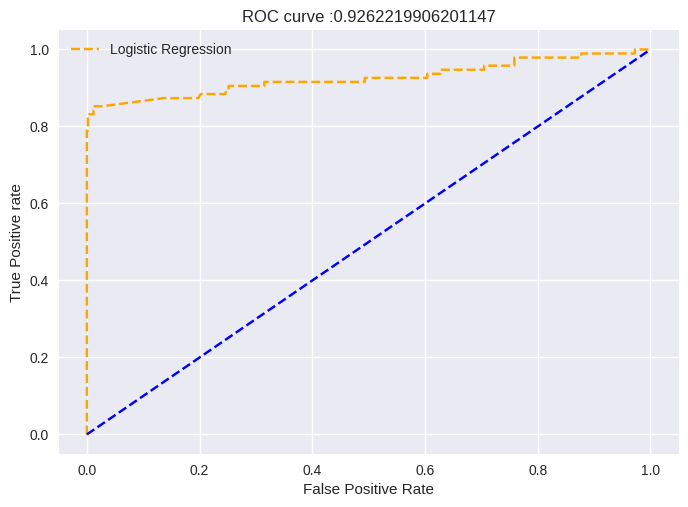

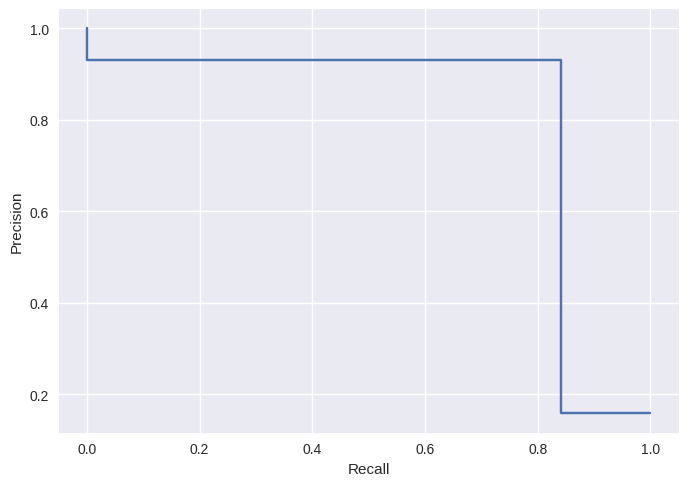

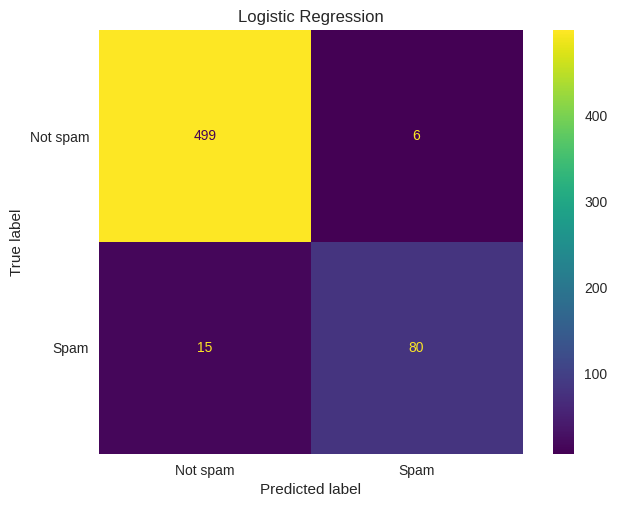

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       505
           1       0.93      0.84      0.88        95

    accuracy                           0.96       600
   macro avg       0.95      0.92      0.93       600
weighted avg       0.96      0.96      0.96       600

Naive Bayes
Model: Naive Bayes has cross validation mean: 0.9324999999999999
Model: Naive Bayes has cross validation standard deviation: 0.02081665999466134


	 Model Analysis 




<ipython-input-54-1773d85bf961>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


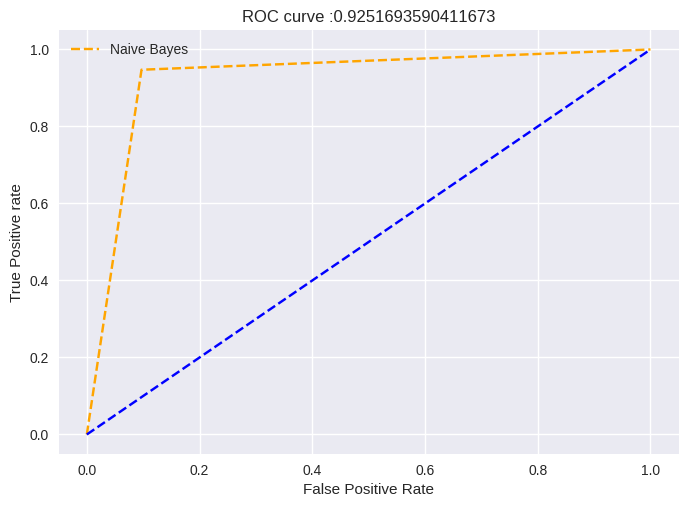

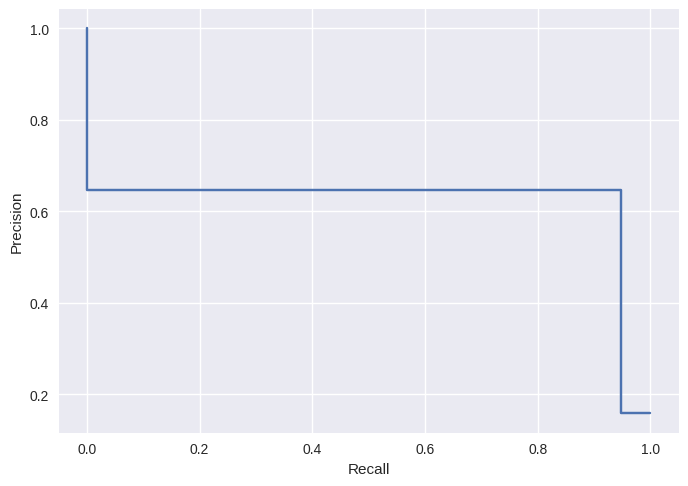

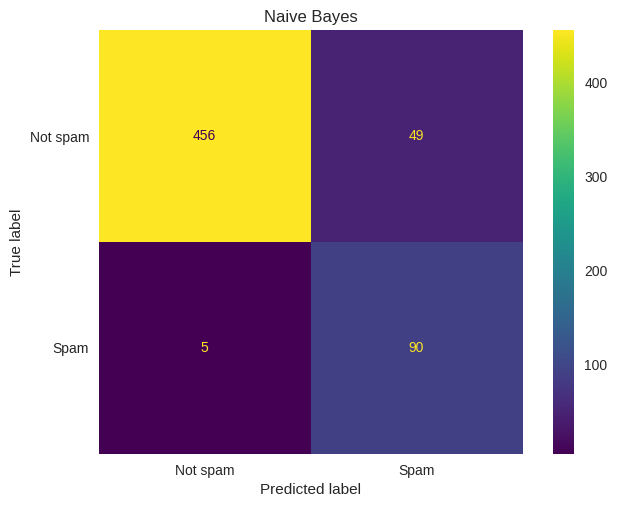

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       505
           1       0.65      0.95      0.77        95

    accuracy                           0.91       600
   macro avg       0.82      0.93      0.86       600
weighted avg       0.94      0.91      0.92       600

Support Vector Classifier
Model: Support Vector Classifier has cross validation mean: 0.9549999999999998
Model: Support Vector Classifier has cross validation standard deviation: 0.00909059342886311


	 Model Analysis 




<ipython-input-54-1773d85bf961>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


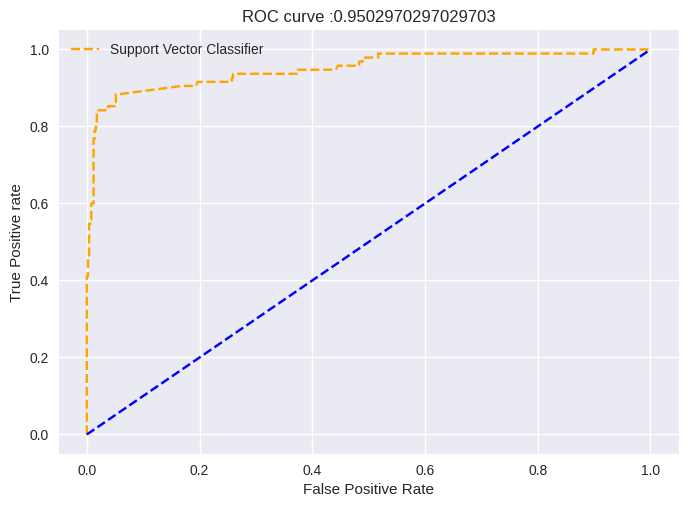

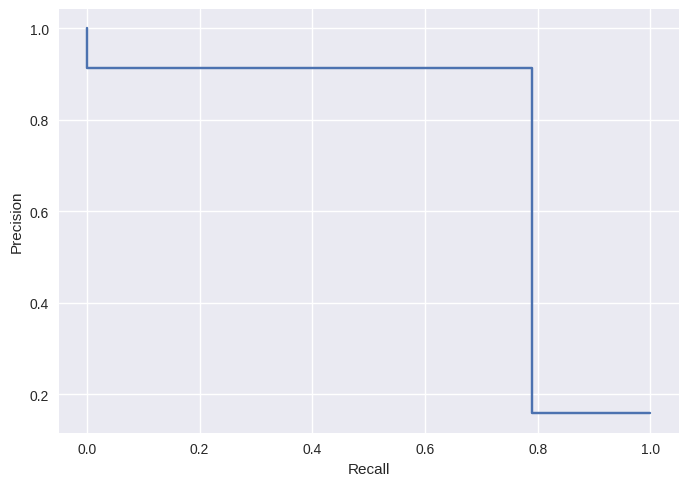

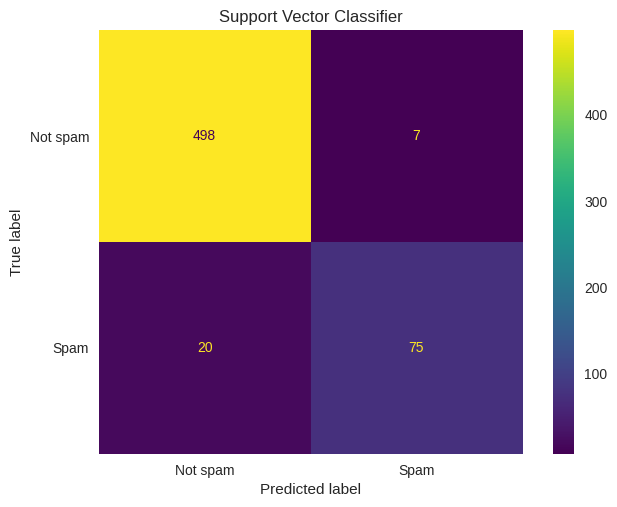

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       505
           1       0.91      0.79      0.85        95

    accuracy                           0.95       600
   macro avg       0.94      0.89      0.91       600
weighted avg       0.95      0.95      0.95       600

Decision Tree Classifier
Model: Decision Tree Classifier has cross validation mean: 0.9475
Model: Decision Tree Classifier has cross validation standard deviation: 0.011365151414154881


	 Model Analysis 




<ipython-input-54-1773d85bf961>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


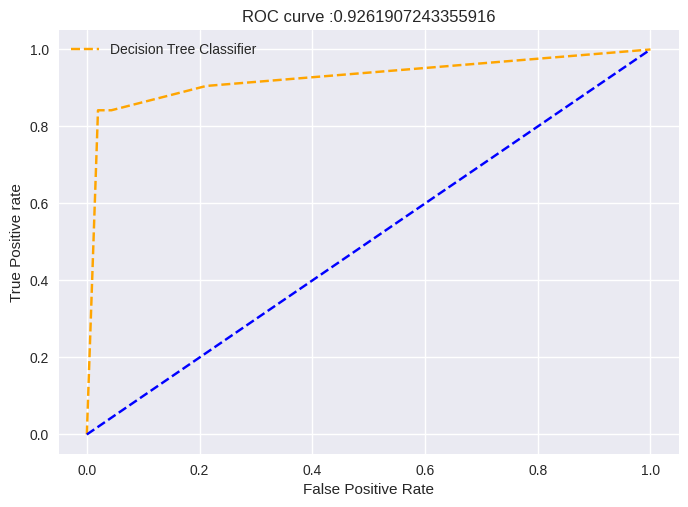

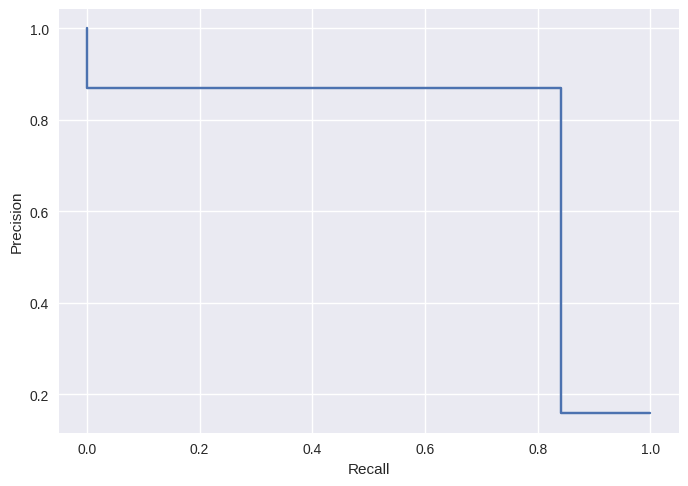

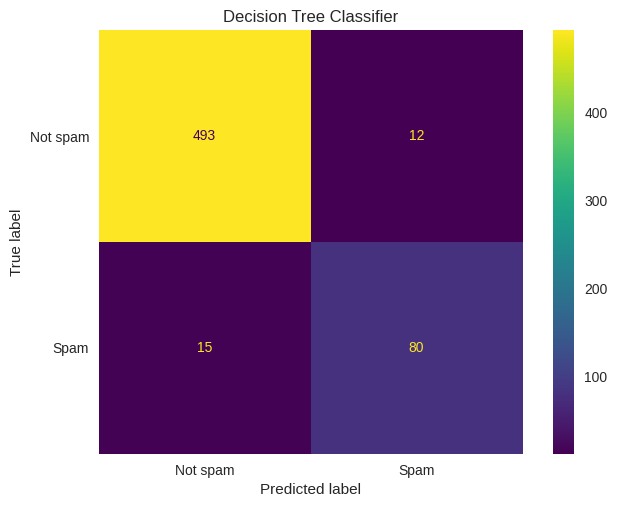

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       505
           1       0.87      0.84      0.86        95

    accuracy                           0.95       600
   macro avg       0.92      0.91      0.91       600
weighted avg       0.95      0.95      0.95       600



In [ ]:
classifiers= ['Logistic Regression','Naive Bayes','Support Vector Classifier', 'Decision Tree Classifier']
models = [LR, NB, MY_SVC, DT]
model_mean =[]
model_std = []
for clf_name, model in zip(classifiers,models):
  print(clf_name)
  cv_result = cross_val_score(model,X_train, y_train, cv=k_fold, scoring='accuracy')
  cv_mean = cv_result.mean()
  cv_std = cv_result.std()
  print(f'Model: {clf_name} has cross validation mean: {cv_mean}')
  print(f'Model: {clf_name} has cross validation standard deviation: {cv_std}')
  print("\n\n\t Model Analysis \n\n")
  model.fit(X_train,y_train)
  pred_prob = model.predict_proba(X_test)
  generate_roc_curve(pred_prob, y_test, label = clf_name)
  pred = model.predict(X_test)
  prec, recall, _ = precision_recall_curve(y_test, pred, pos_label=model.classes_[1])
  pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
  plt.show()
  ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels = ['Not spam', "Spam"])
  plt.grid(visible=None)
  plt.title(clf_name)
  plt.show()
  report = classification_report(y_test, pred)
  print(report)
  model_mean.append(cv_mean)
  model_std.append(cv_std)

Logistic Regression
Model: Logistic Regression has cross validation mean: 0.9749999999999999
Model: Logistic Regression has cross validation standard deviation: 0.006454972243679006


	 Model Analysis 




<ipython-input-54-1773d85bf961>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


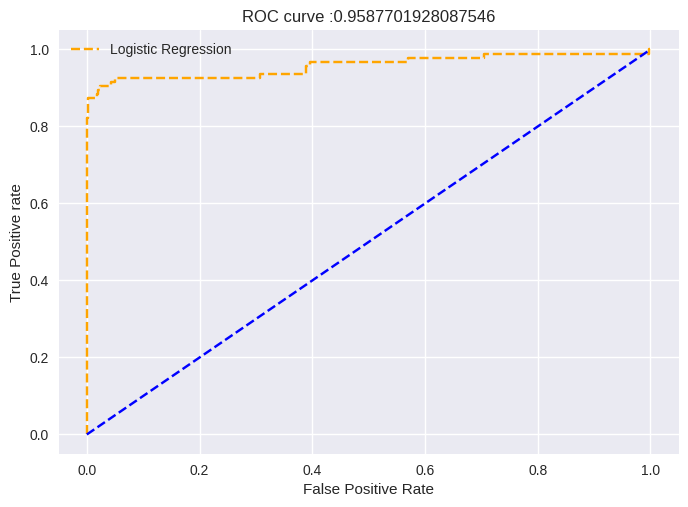

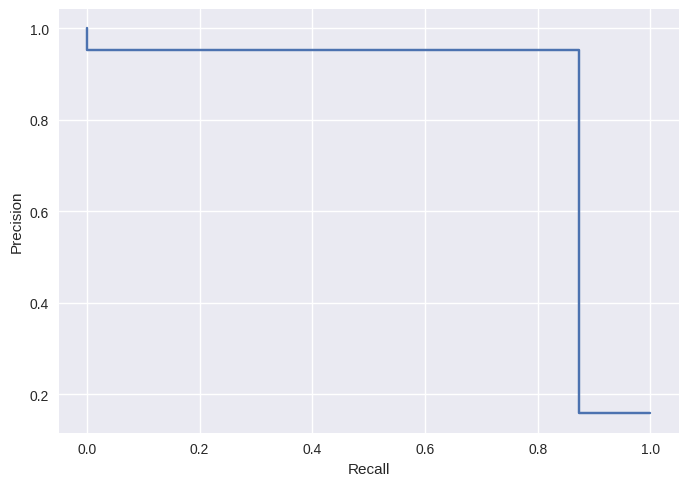

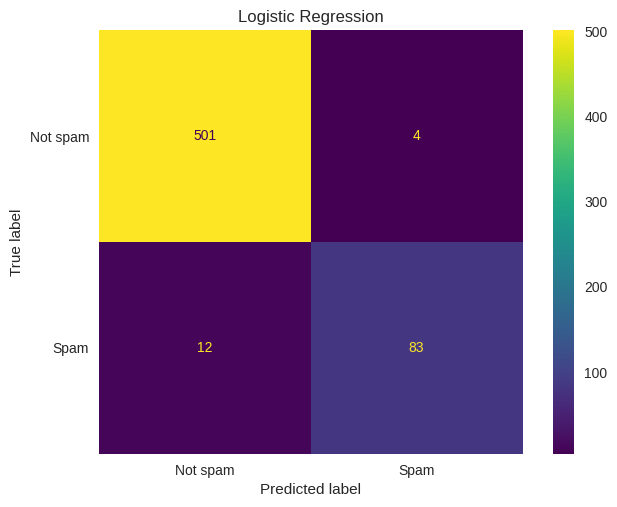

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       505
           1       0.95      0.87      0.91        95

    accuracy                           0.97       600
   macro avg       0.97      0.93      0.95       600
weighted avg       0.97      0.97      0.97       600

Naive Bayes
Model: Naive Bayes has cross validation mean: 0.9020833333333333
Model: Naive Bayes has cross validation standard deviation: 0.01760385847856466


	 Model Analysis 




<ipython-input-54-1773d85bf961>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


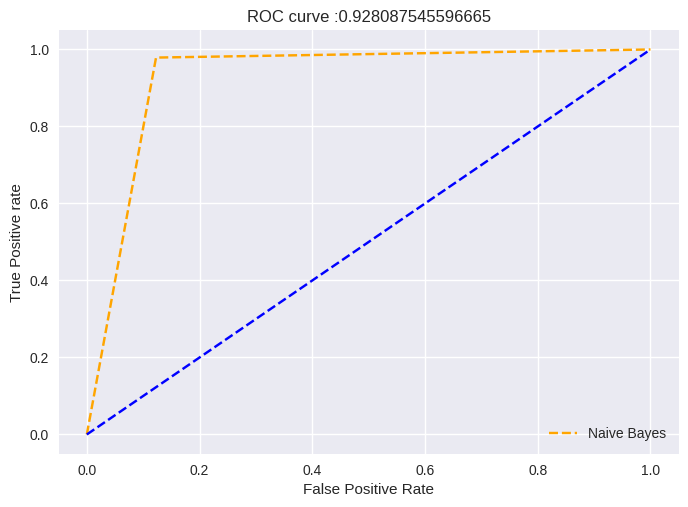

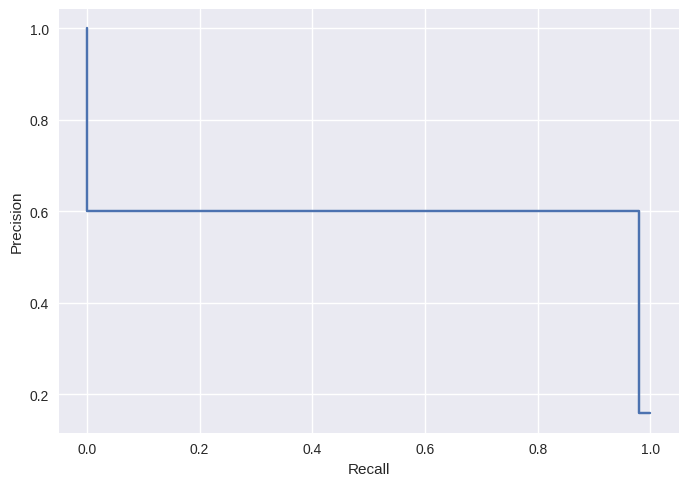

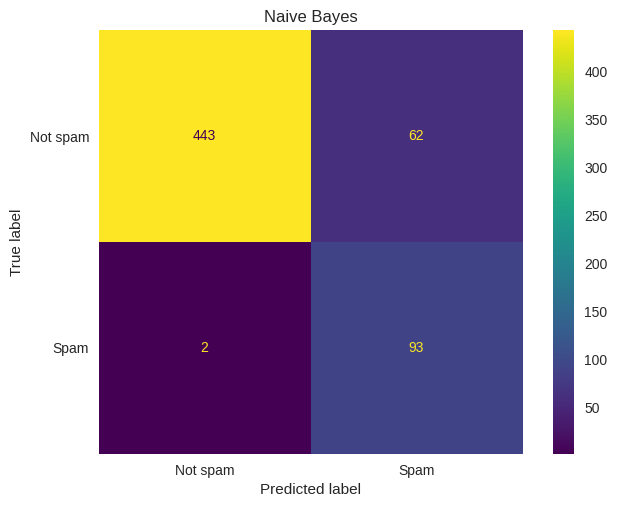

              precision    recall  f1-score   support

           0       1.00      0.88      0.93       505
           1       0.60      0.98      0.74        95

    accuracy                           0.89       600
   macro avg       0.80      0.93      0.84       600
weighted avg       0.93      0.89      0.90       600

Support Vector Classifier
Model: Support Vector Classifier has cross validation mean: 0.9304166666666666
Model: Support Vector Classifier has cross validation standard deviation: 0.008133008873309642


	 Model Analysis 




<ipython-input-54-1773d85bf961>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


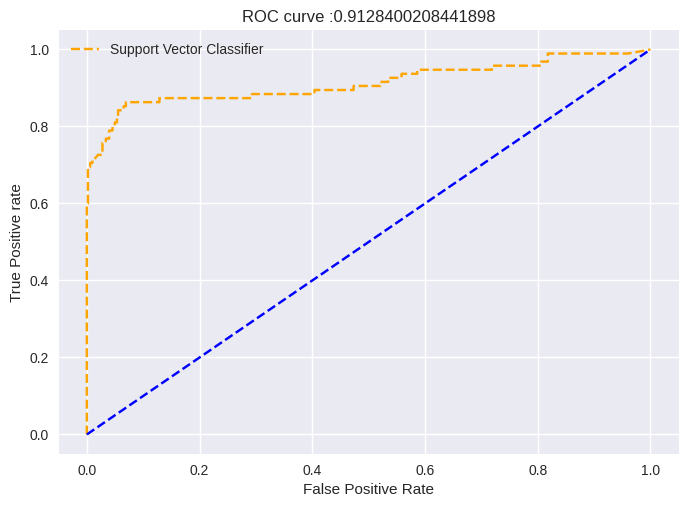

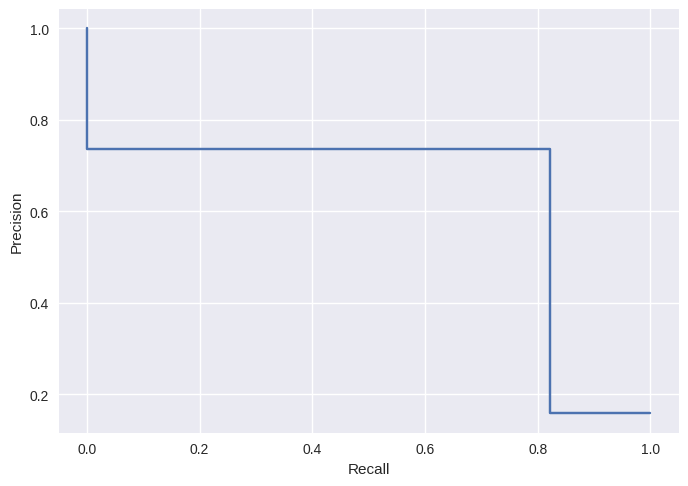

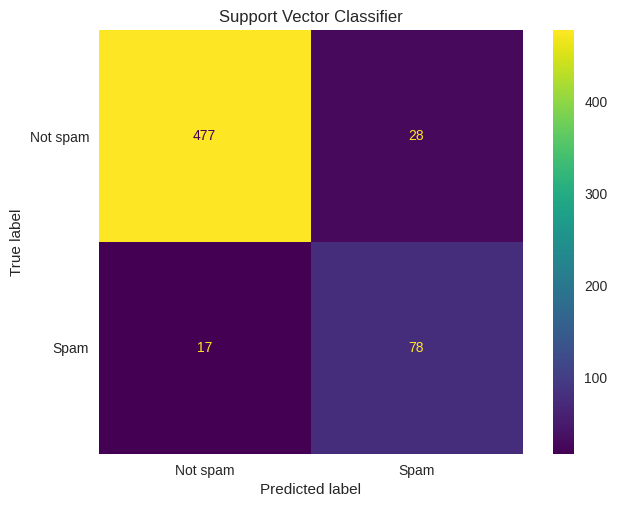

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       505
           1       0.74      0.82      0.78        95

    accuracy                           0.93       600
   macro avg       0.85      0.88      0.87       600
weighted avg       0.93      0.93      0.93       600

Decision Tree Classifier
Model: Decision Tree Classifier has cross validation mean: 0.9433333333333334
Model: Decision Tree Classifier has cross validation standard deviation: 0.021015867021530823


	 Model Analysis 




<ipython-input-54-1773d85bf961>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


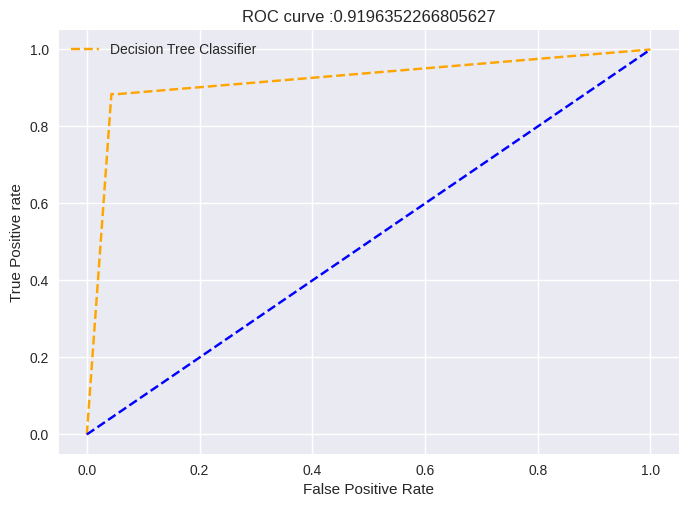

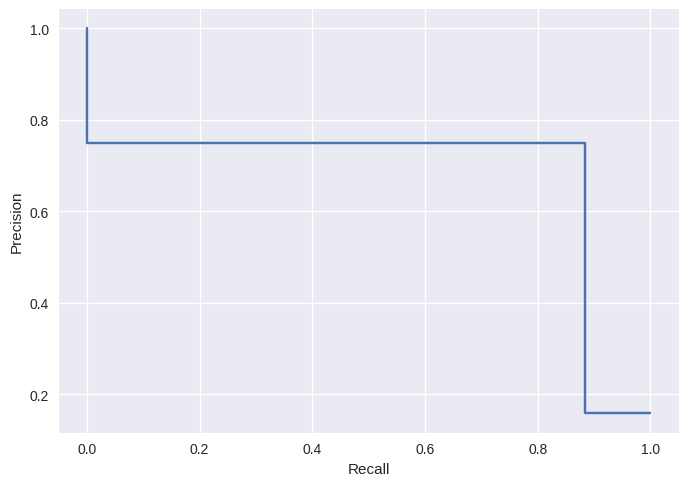

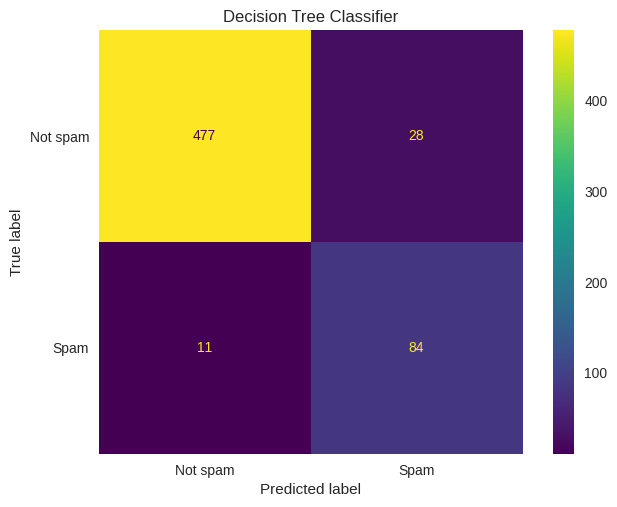

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       505
           1       0.75      0.88      0.81        95

    accuracy                           0.94       600
   macro avg       0.86      0.91      0.89       600
weighted avg       0.94      0.94      0.94       600



In [ ]:
classifiers= ['Logistic Regression','Naive Bayes','Support Vector Classifier', 'Decision Tree Classifier']
models = [LR, NB, MY_SVC, DT]
model_mean =[]
model_std = []
for clf_name, model in zip(classifiers,models):
  print(clf_name)
  cv_result = cross_val_score(model,X_train_2, y_train_2, cv=k_fold, scoring='accuracy')
  cv_mean = cv_result.mean()
  cv_std = cv_result.std()
  print(f'Model: {clf_name} has cross validation mean: {cv_mean}')
  print(f'Model: {clf_name} has cross validation standard deviation: {cv_std}')
  print("\n\n\t Model Analysis \n\n")
  model.fit(X_train_2,y_train_2)
  pred_prob = model.predict_proba(X_test_2)
  generate_roc_curve(pred_prob, y_test_2, label = clf_name)
  pred = model.predict(X_test_2)
  prec, recall, _ = precision_recall_curve(y_test_2, pred, pos_label=model.classes_[1])
  pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
  plt.show()
  ConfusionMatrixDisplay.from_predictions(y_test_2, pred, display_labels = ['Not spam', "Spam"])
  plt.grid(visible=None)
  plt.title(clf_name)
  plt.show()
  report = classification_report(y_test_2, pred)
  print(report)
  model_mean.append(cv_mean)
  model_std.append(cv_std)

In [ ]:
# Step 1 -Fit all the four models

#YOUR CODE HERE

In [ ]:
# Step 2 -Train your models

#YOUR CODE HERE

### **Exercise 4**:
* Obtain the Confusion Matrices for all models (2 Point)

In [ ]:
#YOUR CODE HERE